# Author: Kumar R.

# 1.Task-KNN

In this task, I will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [1]:
# load the required libraries.
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the dataset
with open("nba_2013.csv", 'r') as csvfile:
    data = pd.read_csv(csvfile)

In [ ]:
#data = pd.read_csv("nba_2013.csv")

In [3]:
data.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

## EDA (Exploratory Data Analysis)

In [5]:
def isnull(data):
    for columns in data.columns:
        if data[columns].isnull().any():
            na= data[columns].isnull().sum()
            objtype = data[columns].dtype
            lo = data[columns]
            print(f"There are {na} missing values in the column: {columns} and Its object type is {objtype}")
    else:
        print("There are no missing values in any of the columns")
            

In [6]:
isnull(data)

There are 2 missing values in the column: fg. and Its object type is float64
There are 67 missing values in the column: x3p. and Its object type is float64
There are 3 missing values in the column: x2p. and Its object type is float64
There are 2 missing values in the column: efg. and Its object type is float64
There are 20 missing values in the column: ft. and Its object type is float64
There are no missing values in any of the columns


In [7]:
#Filling the missing values with the 'MEAN' of the perticular column.
from sklearn.impute import SimpleImputer
missing = SimpleImputer(missing_values=np.nan, strategy='mean')
missing.fit(data[['fg.','x3p.','x2p.','efg.','ft.']])
data[['fg.','x3p.','x2p.','efg.','ft.']] = missing.transform(data[['fg.','x3p.','x2p.','efg.','ft.']])

In [ ]:
#data['fg.'].fillna(data['fg.'].mean(), inplace=True)

In [8]:
#Cross_Check if there any missing values.
isnull(data)

There are no missing values in any of the columns


In [9]:
#I'm deleting the column "PLAYER" & 'BREF_TEAM_ID','SEASON','SEASON_END'.
data.drop(['player','bref_team_id','season','season_end'],axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     481 non-null    object 
 1   age     481 non-null    int64  
 2   g       481 non-null    int64  
 3   gs      481 non-null    int64  
 4   mp      481 non-null    int64  
 5   fg      481 non-null    int64  
 6   fga     481 non-null    int64  
 7   fg.     481 non-null    float64
 8   x3p     481 non-null    int64  
 9   x3pa    481 non-null    int64  
 10  x3p.    481 non-null    float64
 11  x2p     481 non-null    int64  
 12  x2pa    481 non-null    int64  
 13  x2p.    481 non-null    float64
 14  efg.    481 non-null    float64
 15  ft      481 non-null    int64  
 16  fta     481 non-null    int64  
 17  ft.     481 non-null    float64
 18  orb     481 non-null    int64  
 19  drb     481 non-null    int64  
 20  trb     481 non-null    int64  
 21  ast     481 non-null    int64  
 22  st

In [11]:
data.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [12]:
#Check if there are any duplicate columns
data.duplicated().any()

False

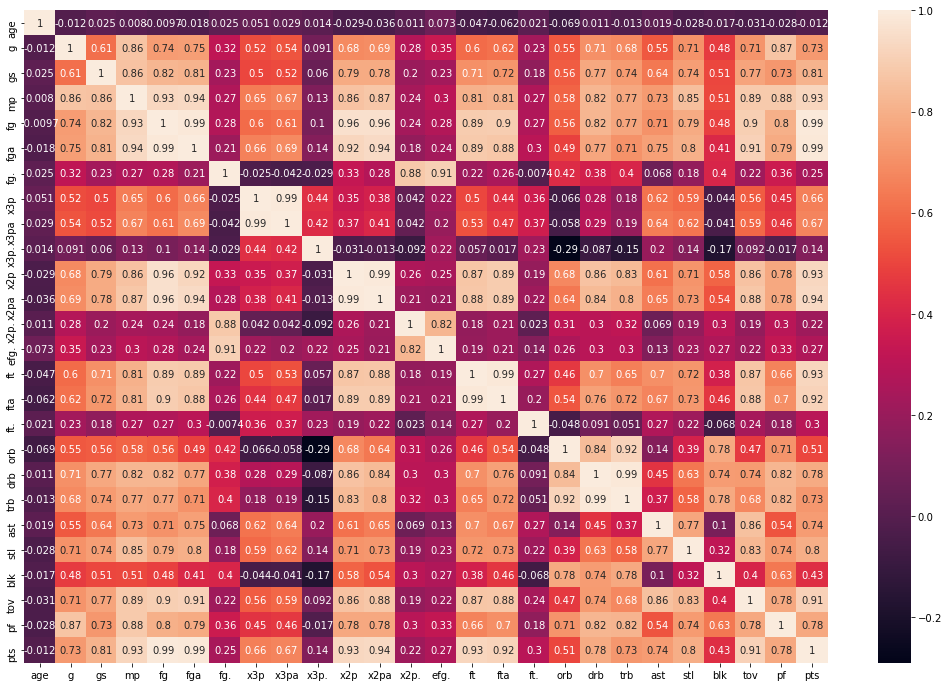

In [13]:
#Cheeck the correlation of the data
correlation = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True)
plt.show()

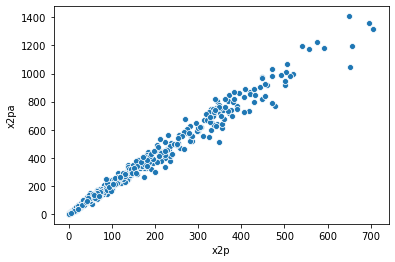

In [14]:
#Relation between 'x2p' and 'x2pa'
sns.scatterplot('x2p','x2pa', data=data)

Both have linear relationship, these two are 99% correlated.

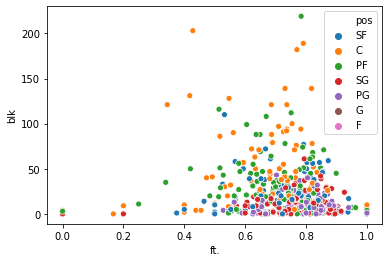

In [15]:
#Scatter plot of 'ft.'and 'blk'
sns.scatterplot('ft.','blk', data=data, hue='pos')
plt.show()

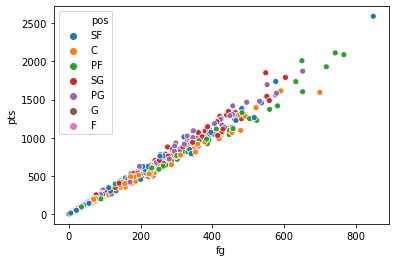

In [16]:
#Scatter plot of 'fg' and 'pts'
sns.scatterplot('fg','pts', data=data, hue='pos')
plt.show()

fg column is highly correlated to output column 'pts'

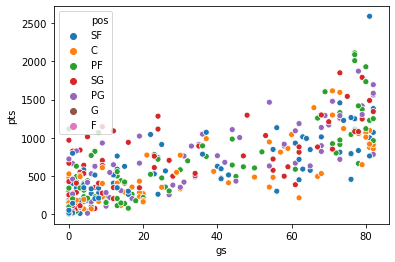

In [17]:
sns.scatterplot('gs','pts', data=data, hue='pos')
plt.show()

In [18]:
#Since the 'age' column is less correlated to the performance of the player, I'm dropping out the 'age' column.currently I'm not dropping the features that are highly correlated to each other
data.drop('age', axis=1, inplace=True)

In [19]:
value = data['pos'].value_counts()
value

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

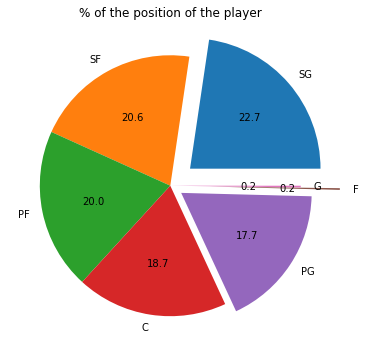

In [20]:
#Visualization of position of the player
plt.figure(figsize=(6,6))
lab = value.index
expo = (0.2,0,0,0,0.1,0.3,0)
plt.pie(value,autopct='%.1f', labels=lab,explode=expo)
plt.title("% of the position of the player")
plt.show()

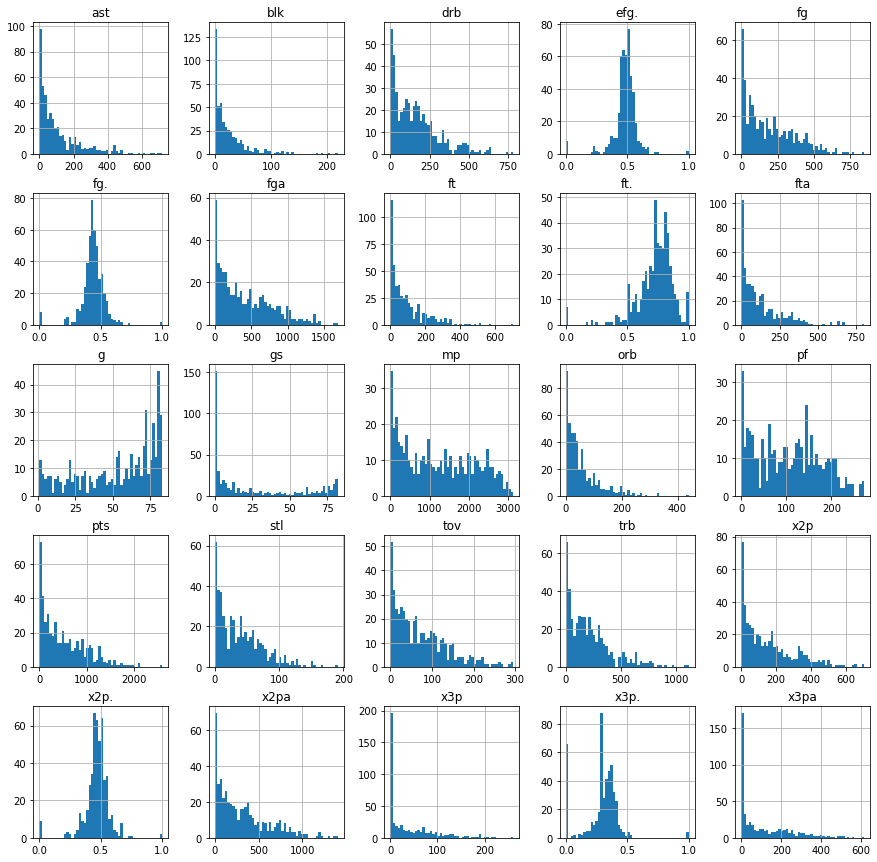

In [21]:
#Distribution of the data in column vise.
data.hist(bins=50, figsize=(15,15))
plt.show()

In [22]:
#Seperation of the features and label
feature = data.iloc[:,:-1].values
label = data.iloc[:,25].values

In [23]:
#Printing the number of rows and columns of both feature and label
print(f"feature shape: {feature.shape}, label: {label.shape}")

feature shape: (481, 25), label: (481,)


In [24]:
print(f"Number of dimensions of feature: {feature.ndim} and label: {label.ndim}")

Number of dimensions of feature: 2 and label: 1


In [25]:
#Converting the categorical column "POS" inot neumeric.
from sklearn.preprocessing import LabelEncoder
lefeature = LabelEncoder()
feature[:,0] = lefeature.fit_transform(feature[:,0])

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe_feature = OneHotEncoder(sparse=False)
pos_new = ohe_feature.fit_transform(feature[:,0].reshape(-1,1))

In [27]:
#concatination of pos_new and feature columns
features = np.concatenate((pos_new, feature[:,1:]), axis=1)

In [28]:
print(f'Shape of the new feature set: {features.shape}, number of dimension: {features.ndim}')

Shape of the new feature set: (481, 31), number of dimension: 2


In [29]:
#Splitting both training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, label, test_size=0.2, random_state=241)

#Model training
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(x_train,y_train)


#Get the model score
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)

print(f"Test score: {test_score} & train score: {train_score}")

Test score: 0.9902852963245165 & train score: 0.9786486534549865


In [30]:
#Prediction 
y_preed = model.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error
print(f'MSE:{mean_squared_error(y_test,y_preed)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_preed))}')

MSE:2407.062680412371
RMSE:49.06182508236287


### Save the model

In [32]:
import pickle
pickle.dump(lefeature, open("LabeleNCODER.model","wb"))
pickle.dump(ohe_feature, open("OneHotEncoder.model","wb"))
pickle.dump(model, open("KNN_Regression.model","wb"))

# 2.Task-Text Scraper

In this task I have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

In [33]:
#Import the required libraries
from bs4 import BeautifulSoup
import urllib
import nltk
import requests
import re

In [34]:
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/BMW')
html = response.read()
raw = BeautifulSoup(html,"html5lib").get_text()

In [35]:
nltk.download('punkt')
words = nltk.word_tokenize(raw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
words = [word for word in words if len(word) > 1]

# Removing any numbers present in our text

words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)

words = [word.lower() for word in words]

# Calculating frequency distribution

fdist = nltk.FreqDist(words)

# Printing the top 30 words with their frequency

for word, frequency in fdist.most_common(30):
    print(u'{}; {}'.format(word, frequency))

''; 777
the; 486
bmw; 415
in; 255
``; 192
of; 173
and; 172
from; 136
on; 118
retrieved; 105
series; 97
to; 96
archived; 96
original; 93
october; 76
.mw-parser-output; 76
with; 65
by; 61
was; 60
's; 52
car; 45
for; 45
is; 42
cars; 40
company; 40
group; 39
models; 34
articles; 31
engine; 31
as; 30


# 3.Task-Gray_Scale_Image

In this task I have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

In [37]:
#load the required libraries
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

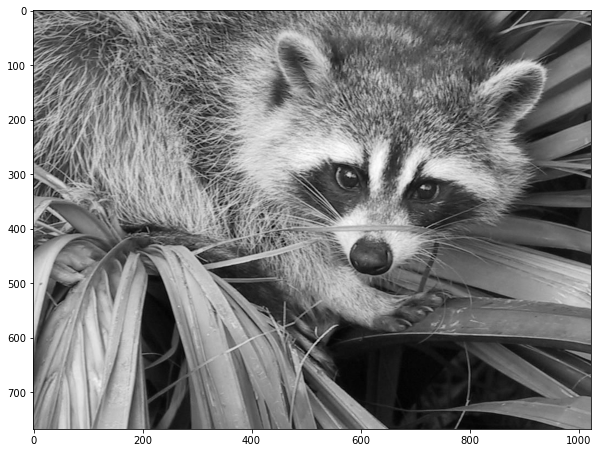

In [38]:
#load the original image and visualization
Racoon = scipy.misc.face(gray=True)
plt.figure(figsize=(10,10))
plt.imshow(Racoon,plt.cm.gray)
plt.show()

In [39]:
print(f"Rows: {Racoon.shape[0]}, Columns: {Racoon.shape[1]}")

Rows: 768, Columns: 1024


In [40]:
#Ravel the matrix(image)
rows = Racoon.shape[0]
columns = Racoon.shape[1]
image  = Racoon.reshape(rows*columns,1)

In [41]:
#Using KMeans to compress the image
kmeans = KMeans(n_clusters=5)
kmeans.fit(image)

KMeans(n_clusters=5)

In [42]:
#Getting the cluster and the labels for the image
clusters = kmeans.cluster_centers_
labels = kmeans.labels_
#Reshaping to marix(768 x 1024) 
labels = labels.reshape(rows,columns)

In [43]:
print(clusters)

[[111.62805703]
 [150.24313581]
 [ 27.11166441]
 [192.8878986 ]
 [ 73.35388722]]


In [44]:
#Save the compressed image
plt.imsave("Racoon_compressed.png",labels)

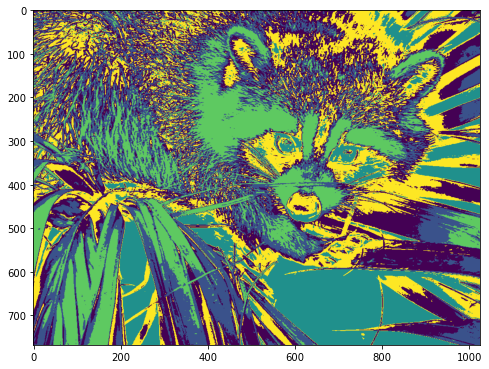

In [45]:
#Visualize the compresssed image
compressed_image = plt.imread('Racoon_compressed.png')
plt.figure(figsize=(8,8))
plt.imshow(compressed_image)
plt.show()

# 4.Task_PCA_Visualisation.

In this task I have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [46]:
#load the required libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [47]:
#Load the data set (iris)
data = sns.load_dataset("iris")

In [48]:
data.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [53]:
#seperate the features and labels
feature = data.iloc[:,:-1].values
label = data.iloc[:,[4]].values

In [52]:
feature.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [54]:
#Decomposing the 4 features into 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(feature)

In [55]:
data_iris = pd.DataFrame(data=pca_data, columns=['PCA-1','PCA-2','PCA-3'])
data_iris.head(3)

,PCA-1,PCA-2,PCA-3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900


In [56]:
#Concatination of PCA and label column.
final_data = pd.concat((data_iris,data.iloc[:,[4]]), axis=1)

In [57]:
final_data.head()

,PCA-1,PCA-2,PCA-3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


In [58]:
final_data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

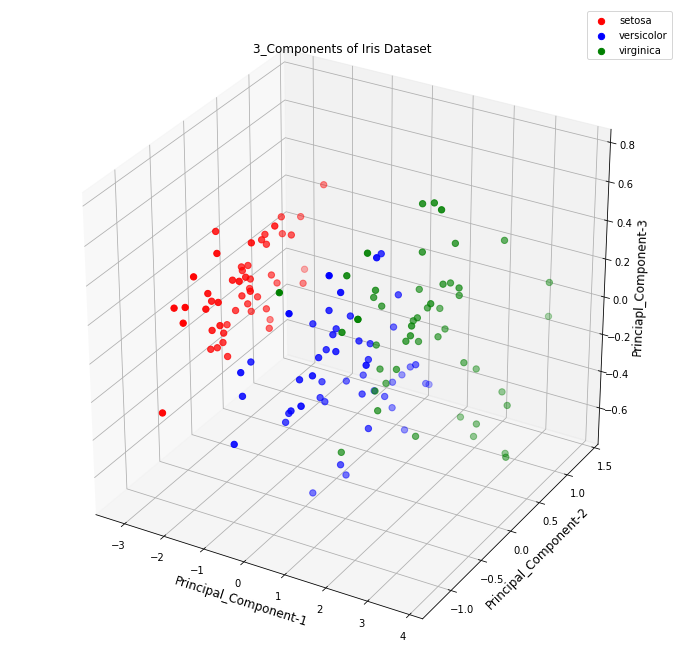

In [59]:
#Visualization of PCA data
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111, projection='3d')
ax.set_xlabel("Principal_Component-1", fontsize=12)
ax.set_ylabel("Principal_Component-2", fontsize=12)
ax.set_zlabel("Princiapl_Component-3", fontsize=12)
ax.set_title("3_Components of Iris Dataset", fontsize=12)

labels=["setosa","versicolor","virginica"]
colours=['red','blue','green']

for label,color in zip(labels,colours):
    indices = final_data['species']==label
    ax.scatter(final_data.loc[indices, 'PCA-1'],
              final_data.loc[indices,'PCA-2'],
              final_data.loc[indices,'PCA-3'],
              c=color,
              s=40)
ax.legend(labels)
ax.grid()
plt.show()

# 5.Task-ARIMA

In this task I have to make ARIMA model over shampoo salesdata and check the MSE between predicted and actual value.

In [60]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [61]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=True,index_col='Month')

In [62]:
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [63]:
series = series.dropna()

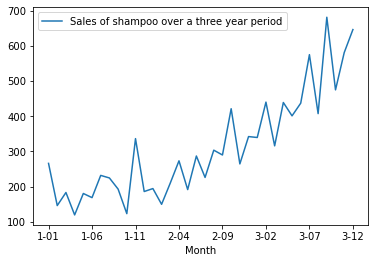

In [64]:
series.plot()
plt.show()

In [65]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [66]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [67]:
train, test = X[0:size], X[size:len(X)]

In [68]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

Predicted=[272.96449841],Expected =[421.6]
Predicted=[290.31371648],Expected =[264.5]
Predicted=[349.11773367],Expected =[342.3]
Predicted=[306.51300163],Expected =[339.7]
Predicted=[387.37643617],Expected =[440.4]
Predicted=[348.15420942],Expected =[315.9]
Predicted=[386.30879763],Expected =[439.3]
Predicted=[356.0820629],Expected =[401.3]
Predicted=[446.37948437],Expected =[437.4]
Predicted=[394.73730893],Expected =[575.5]
Predicted=[434.91546906],Expected =[407.6]
Predicted=[507.92336853],Expected =[682.]
Predicted=[435.48270978],Expected =[475.3]
Predicted=[652.74386804],Expected =[581.3]
Predicted=[546.34350458],Expected =[646.9]
TEST MSE :7547.808140322868


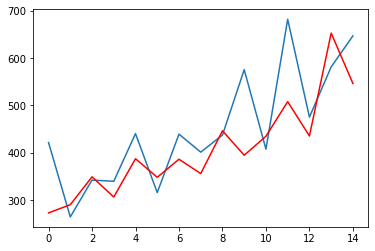

In [69]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()